# About Data :
Within the excel file ‘Losses’ are daily claims (values, as at the time of the loss), by loss cause, between 1st January 1999 to 29 December 2007 for one portfolio of a UK insurance company. 

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**The first step to any kind of exploration and modelling requires us to load the data file into the environment.**

In [2]:
# Reading dataset using read_excel method
data_df = pd.read_excel('Losses.xlsx')

**Let's Check the dimensions of this data**

In [3]:
# Checking 
data_df.shape
print("Number of rows: "+str(data_df.shape[0]))
print("Number of columns: "+str(data_df.shape[1]))

Number of rows: 47565
Number of columns: 6


**Let's take a look at the top 5 rows of the data to understand what this file contains.**

In [4]:
# The .head() function helps us to show top 5 records
data_df.head()

,DAY,MONTH,MONTH_ID,YEAR,CAUSE,GROSS INCURRED AMOUNT
0,1,January,1,1999,WINDSTORM,477.88
1,1,January,1,1999,FIRE,700.00
2,1,January,1,1999,WINDSTORM,99.87
3,1,January,1,1999,WINDSTORM,139.80
4,1,January,1,1999,WINDSTORM,548.66


**To understand the data better that we are going to deal with we would like to have a look at the basic numerical stats of the data like the mean, maximum etc. columnwise.**

In [5]:
# The .describe() function helps us.
data_df.describe()

,DAY,MONTH_ID,YEAR,GROSS INCURRED AMOUNT
count,47565.000000,47565.000000,47565.000000,47565.000000
mean,15.182802,6.379270,2004.335583,1072.416586
std,9.224491,3.579773,2.463259,3997.920914
min,1.000000,1.000000,1999.000000,-31989.780000
25%,7.000000,3.000000,2002.000000,158.630000
50%,15.000000,7.000000,2005.000000,400.000000
75%,23.000000,10.000000,2006.000000,888.610000
max,31.000000,12.000000,2007.000000,249499.510000


**describe() method** deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

- count tells us the number of NoN-empty rows in a feature.
- mean tells us the mean value of that feature.
- std tells us the Standard Deviation Value of that feature.
- min tells us the minimum value of that feature.
- 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
- max tells us the maximum value of that feature.


In [6]:
#datatypes of all present attributes in the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47565 entries, 0 to 47564
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DAY                    47565 non-null  int64  
 1   MONTH                  47565 non-null  object 
 2   MONTH_ID               47565 non-null  int64  
 3   YEAR                   47565 non-null  int64  
 4   CAUSE                  47565 non-null  object 
 5   GROSS INCURRED AMOUNT  47565 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [7]:
#number of distinct elements in each attribute
data_df.nunique(axis=0)

DAY                         31
MONTH                       12
MONTH_ID                    12
YEAR                         9
CAUSE                        8
GROSS INCURRED AMOUNT    19865
dtype: int64

**Checking the Null Values in the data set**

In [8]:
# using .isnull().sum()

data_df.isnull().sum()

DAY                      0
MONTH                    0
MONTH_ID                 0
YEAR                     0
CAUSE                    0
GROSS INCURRED AMOUNT    0
dtype: int64

**Checking duplicate entry in the data set**

In [9]:
# using .duplicated().sum()

data_df.duplicated().sum()

3264

**In our dataset 3264 duplicate entry is present. So first we remove it.**

In [10]:
data_df.drop_duplicates(inplace = True)

## Now we will first solve the given three problems and then make our model. 

#### Q1. What are the total claims by year and what trends are there? What could be driving these trends?

**a -What are the total value of claims by year?**

In [11]:
year = []
total_values=[]
for i in data_df['YEAR'].unique():
    total_value =data_df.loc[data_df['YEAR'] == i, 'GROSS INCURRED AMOUNT'].sum()
    year.append(i)
    total_values.append(total_value.round(2))
'''    print("--------------------------------------------")
    print("Year", i)
    print("Total claims in this year", total_value)'''
dict = {'YEAR': year, 'GROSS INCURRED AMOUNT': total_values}
df = pd.DataFrame(dict)
df

,YEAR,GROSS INCURRED AMOUNT
0,1999,1504421.74
1,2000,3326081.57
2,2001,3535301.70
3,2002,3262541.63
4,2003,3135699.13
5,2004,4022203.93
6,2005,6230756.87
7,2006,9818361.64
8,2007,15181791.84


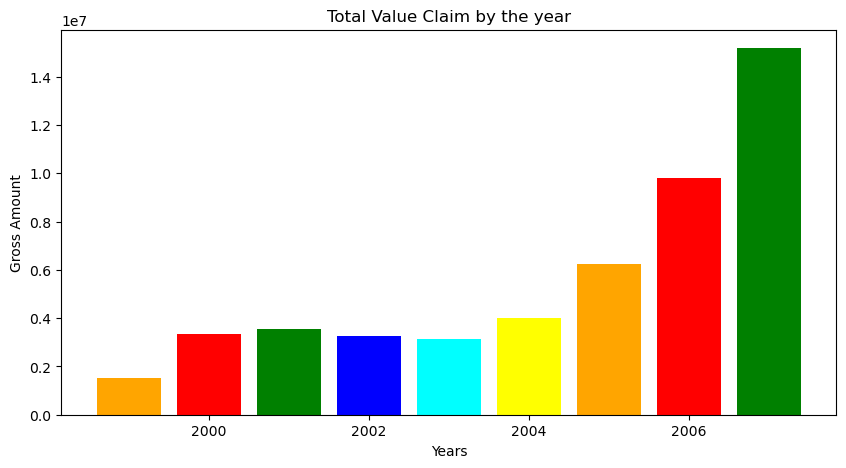

In [12]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df['YEAR'], df['GROSS INCURRED AMOUNT'], color=['orange', 'red', 'green', 'blue', 'cyan','yellow'])
 
plt.xlabel("Years")
plt.ylabel("Gross Amount")
plt.title("Total Value Claim by the year")
plt.show()

**What factors, internal and external to the insurer, could be driving any trends that you have identified?**

In [13]:
total_values = []
cause=[]
for i in data_df['CAUSE'].unique():
    total_value =data_df.loc[data_df['CAUSE'] == i, 'GROSS INCURRED AMOUNT'].sum()
    #print("--------------------------------------------")
    #print("CAUSE:", i)
    cause.append(i)
    total_values.append(total_value.round(2))
    #print("Total claims with this cause:", total_value.round(2))
dict = {'CAUSE': cause, 'GROSS INCURRED AMOUNT': total_values}
df1 = pd.DataFrame(dict)
df1

,CAUSE,GROSS INCURRED AMOUNT
0,WINDSTORM,8751596.65
1,FIRE,7050611.03
2,ESCAPE OF WATER,3405456.11
3,SUBSIDENCE,4773181.49
4,FLOOD,9449495.10
5,ACCIDENTAL DAMAGE,8681913.23
6,THEFT,7156159.83
7,EARTHQUAKE,748746.61


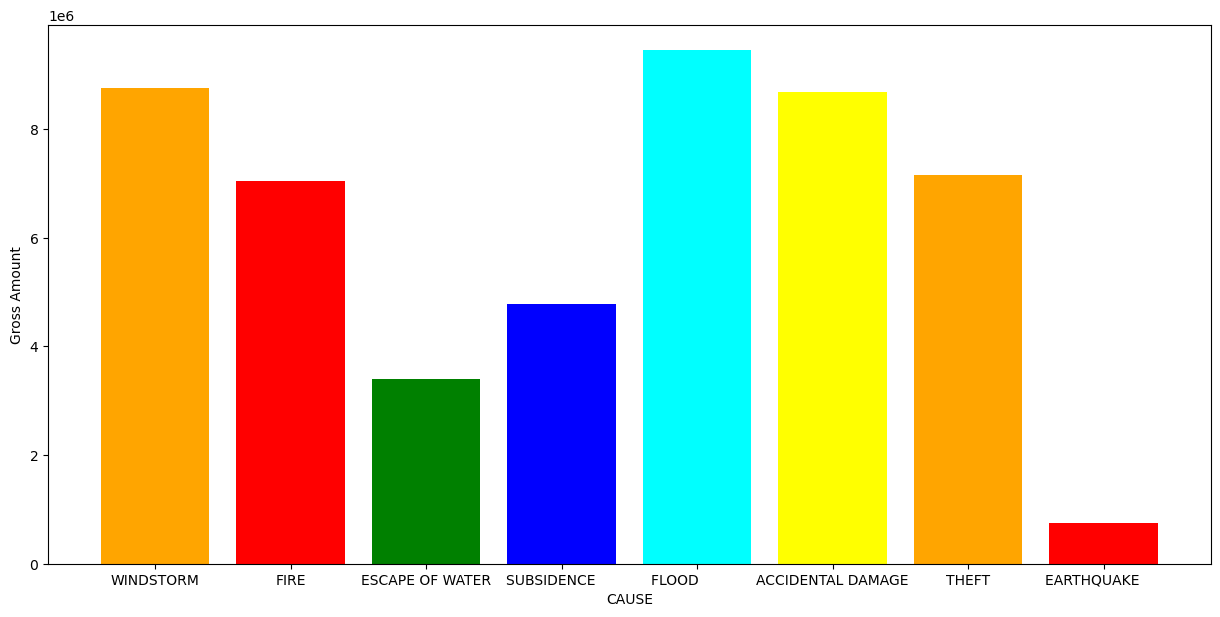

In [14]:
fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(df1['CAUSE'], df1['GROSS INCURRED AMOUNT'],color=['orange', 'red', 'green', 'blue', 'cyan','yellow'])
 
plt.xlabel("CAUSE")
plt.ylabel("Gross Amount")
plt.show()

## Q2. Which perils should the company worry about most and why?

**Which claim types (perils) have the greatest average annual frequency and severity?**

In [18]:
values = []
causes = []
years = []
for c in cause:
    for i in year:
        total_value =data_df.loc[(data_df['YEAR'] == i) & (data_df['CAUSE']==c), 'GROSS INCURRED AMOUNT'].mean()
        values.append(total_value)
        causes.append(c)
        years.append(i)

dict = {'YEAR': years, 'CAUSE': causes, 'CLAIM': values} 
    
df2 = pd.DataFrame(dict)
    
df2

,YEAR,CAUSE,CLAIM
0,1999,WINDSTORM,586.266214
1,2000,WINDSTORM,814.016582
2,2001,WINDSTORM,588.085560
3,2002,WINDSTORM,617.170224
4,2003,WINDSTORM,554.673421
...,...,...,...
67,2003,EARTHQUAKE,NaN
68,2004,EARTHQUAKE,NaN
69,2005,EARTHQUAKE,NaN
70,2006,EARTHQUAKE,NaN


In [19]:
print(df2[['YEAR', 'CAUSE','CLAIM']].sort_values('CLAIM', ascending=False).head(1))

    YEAR            CAUSE      CLAIM
29  2001  SUBSIDENCE       10518.961


#### Here we get that SUBSIDENCE has greatest average annual claims: 10518.961 in the year 2001.  


**What is the average individual claim size by peril across the 9-year time period?**

In [17]:
cause_2 = []
total_value2 = []
for c in causes:
    total_value =data_df.loc[data_df['CAUSE'] == c, 'GROSS INCURRED AMOUNT'].sum()
    cause_2.append(c)
    total_value2.append(total_value.round(2))

dict = {'CAUSE': cause_2, 'CLAIM': total_value2}
df3 = pd.DataFrame(dict)

# Calculating average
result = df3.groupby('CAUSE')['CLAIM'].mean()

# Display result
result.round(2)


CAUSE
ACCIDENTAL DAMAGE    8681913.23
EARTHQUAKE            748746.61
ESCAPE OF WATER      3405456.11
FIRE                 7050611.03
FLOOD                9449495.10
SUBSIDENCE           4773181.49
THEFT                7156159.83
WINDSTORM            8751596.65
Name: CLAIM, dtype: float64

### Q3. What did Windstorm Erwin cost the company? What perils drove the loss?

**What was the total loss, for windstorm and other related weather perils, for Windstorm Erwin (date Jan 7th to Jan 9th, 2005)**


In [18]:
options = ['FLOOD','WINDSTORM','SUBSIDENCE']
df3 = data_df.loc[(data_df['MONTH']=='January') & (data_df['DAY']<9) & (data_df['DAY']>7) & (data_df['CAUSE'].isin(options))]
df3.head()

,DAY,MONTH,MONTH_ID,YEAR,CAUSE,GROSS INCURRED AMOUNT
1947,8,January,1,2000,WINDSTORM,350.00
5221,8,January,1,2001,WINDSTORM,595.00
5223,8,January,1,2001,WINDSTORM,528.75
5224,8,January,1,2001,WINDSTORM,998.75
5226,8,January,1,2001,WINDSTORM,130.00
...,...,...,...,...,...,...
36526,8,January,1,2007,WINDSTORM,114.00
36528,8,January,1,2007,WINDSTORM,264.38
36529,8,January,1,2007,WINDSTORM,1811.20
36531,8,January,1,2007,WINDSTORM,176.00


In [19]:
result_weather = df3.groupby('CAUSE')['GROSS INCURRED AMOUNT'].sum()
print(result_weather)

CAUSE
WINDSTORM    205524.31
Name: GROSS INCURRED AMOUNT, dtype: float64


# NOW WE WILL MAKE OUR MODEL FOR PREDICTION

### Transformation of categorical attributes

In [20]:
# Converting object data type into numeric data type using Label Encoder.

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data_df['MONTH'] = lb.fit_transform(data_df['MONTH'])
data_df['CAUSE'] = lb.fit_transform(data_df['CAUSE'])

**Lets try to understand what this data is all about.**

### Data Visualisation-
Since this is a classification problem it would be important and interesting to the distribution of target variables for the data.

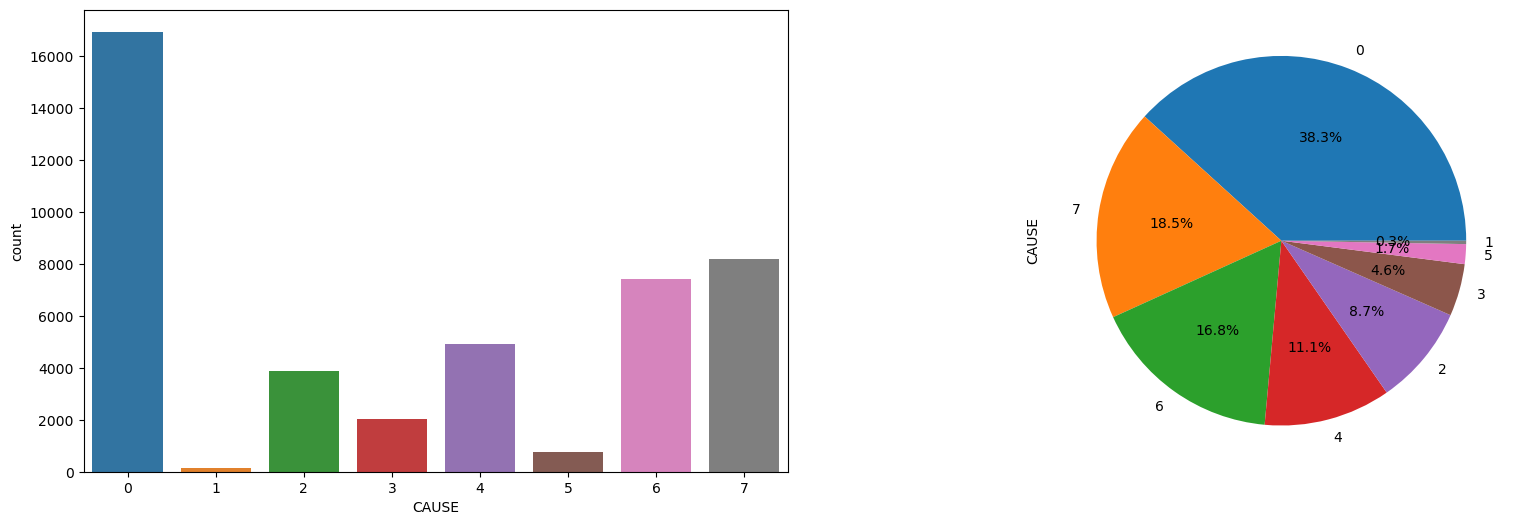

In [21]:
fig, ax=plt.subplots(1,2,figsize=(20,6))
_ = sb.countplot(x='CAUSE', data=data_df, ax=ax[0])
_ = data_df['CAUSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

In [24]:
data_df['CAUSE'].value_counts()

ACCIDENTAL DAMAGE    16950
WINDSTORM             8208
THEFT                 7428
FLOOD                 4916
ESCAPE OF WATER       3876
FIRE                  2025
SUBSIDENCE             768
EARTHQUAKE             130
Name: CAUSE, dtype: int64

**So there are 8 classes of CAUSE for which insurance is claims. We can see that the distribution of the classes is disbalanced. 'ACCIDENTAL DAMAGE' class is in majority while 'EARTHQUAKE' class is the minority here.**

##### Let's check the distribution of data using Histogram and Density visualisation method.¶

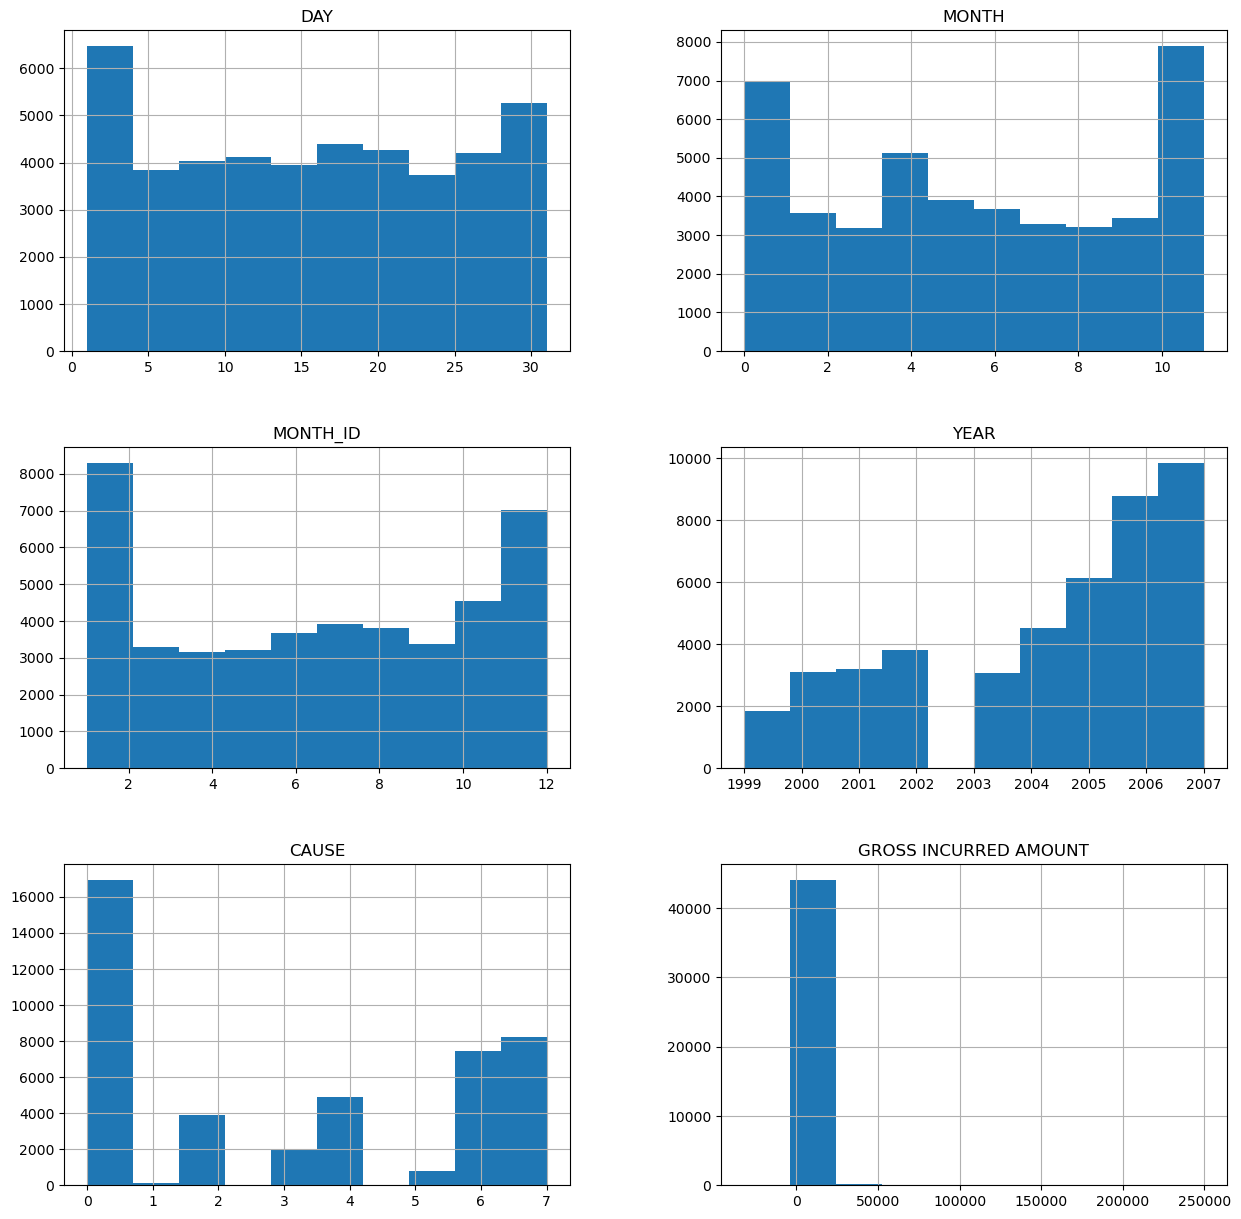

In [22]:
data_df.hist(figsize=(15,15))
plt.show()

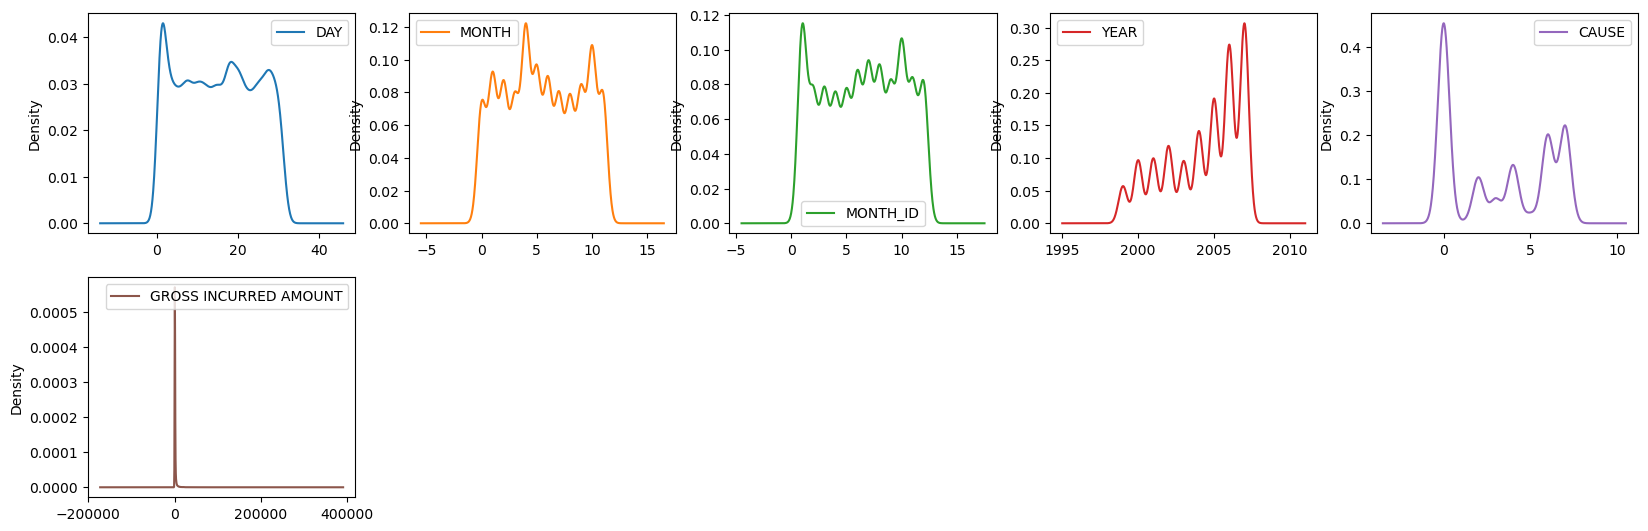

In [23]:
data_df.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(20,20))
plt.show()

**Checking the coorellation**

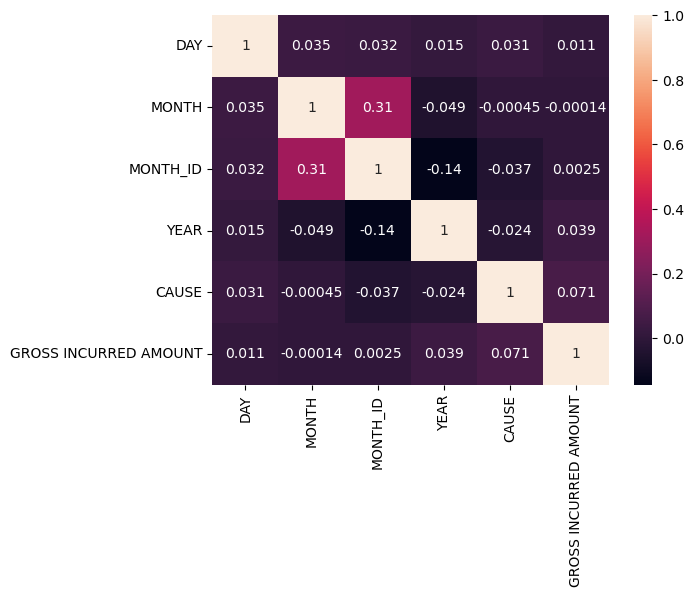

In [24]:
# coorelation between the featues and target

sb.heatmap(data_df.corr(),annot = True)
plt.show()

**Now we will take features and target in seprate variable as an input X and output Y**

In [25]:
# Defining Input and target
X = data_df.drop('CAUSE',axis=1)
Y = data_df['CAUSE']

### Train-Test-Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

**As we know that before giving data to machine we need to change unit of all data.**

In [27]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
X_train =  ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [28]:
X_train.shape

(35440, 5)

In [29]:
X_test.shape

(8861, 5)

In [30]:
Y_train.shape

(35440,)

In [31]:
#! pip install imblearn

In [32]:
from imblearn.over_sampling import SMOTE

X_train1,Y_train1 = SMOTE().fit_resample(X_train,Y_train)
X_test1,Y_test1 = SMOTE().fit_resample(X_test,Y_test)
X_train.shape, Y_train.shape

((35440, 5), (35440,))

In [33]:
Y_test1.value_counts()

7    3398
6    3398
0    3398
3    3398
2    3398
4    3398
5    3398
1    3398
Name: CAUSE, dtype: int64

### Creating a Model Function

In [34]:
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred = model.predict(X_test1)
    
    print(classification_report(Y_test1, Y_pred))
    
    print("Confusion Matrix",confusion_matrix(Y_test1,Y_pred))
    print("Model Accuracy: ",model.score(X_test1,Y_test1))
    return model

from sklearn.metrics import classification_report,confusion_matrix


# 1-Using a Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr = create_model(lr)

Confusion Matrix [[ 998  238  759   18  924  184   70  207]
 [  18 3280   25    0    0    0   68    7]
 [ 633   50 1801   98  246  257   86  227]
 [ 595  174 1005  117  735  480   53  239]
 [ 616  361  154   77 1604  322  101  163]
 [ 242  311  648  183  637 1041  128  208]
 [ 699  254  950   62  883  242   82  226]
 [ 557  127 1153   40  980  157   57  327]]
Model Accuracy:  0.34027369040612127


# 2- Decision Tree Classifier with Gini

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt = create_model(dt)

Confusion Matrix [[1070    8  414  242  506   89  647  422]
 [   4 3217   11   40   11  113    2    0]
 [ 543   24  785  689  196  344  456  361]
 [ 354   41  496  949  367  509  383  299]
 [ 639   25  147  500  871  304  570  342]
 [ 275   68  373  760  320 1096  268  238]
 [ 758   18  438  489  517  169  663  346]
 [ 545   10  343  264  341  143  343 1409]]
Model Accuracy:  0.3700706297822248


# 2.1 Decision Tree Classifier : Pruning Technique : max_depth

In [37]:
dt1=DecisionTreeClassifier(random_state=1,max_depth=8) #bydefault gini
dt1=create_model(dt1)

Confusion Matrix [[1478   18  827   88  671  168   27  121]
 [  24 3219    0    0   89   66    0    0]
 [ 606   13 1612  411  142  494    9  111]
 [ 515   30  769  516  852  638    9   69]
 [ 864    6   91  154 1815  364   12   92]
 [ 173   25  470  275  683 1730   15   27]
 [ 914   26  894  249  941  252   23   99]
 [ 611    3  752  148  679  235    3  967]]
Model Accuracy:  0.41789287816362564


# 2.2 Decision Tree Classifier : Pruning Technique :min_samples_leaf

In [38]:
df2 = DecisionTreeClassifier(random_state=1, min_samples_leaf=87)
df2 = create_model(df2)

Confusion Matrix [[ 946   15  655  274  667  178  373  290]
 [  14 3218    0    6    0  159    1    0]
 [ 411   28 1162  698  107  499  275  218]
 [ 219   58  576  914  504  789  178  160]
 [ 476   27  158  383 1391  520  188  255]
 [  67   45  321  640  507 1734   50   34]
 [ 497   31  600  536  735  338  384  277]
 [ 331   18  438  207  418  233  189 1564]]
Model Accuracy:  0.41616391995291346


# 3 Decision Tree Classifier with Entropy

In [39]:

dt_entropy = DecisionTreeClassifier(random_state=1, criterion='entropy')   

# Criterion should be entropy if you want to calculate with Entropy other wise by default it take Gini Index

dt_entropy = create_model(dt_entropy)

Confusion Matrix [[1110   12  435  209  480   93  644  415]
 [   5 3214   18   71    4   70    7    9]
 [ 573   11  802  633  173  352  464  390]
 [ 349   41  512  962  347  530  380  277]
 [ 638   27  190  494  829  313  550  357]
 [ 237   77  405  773  336 1110  258  202]
 [ 755   11  450  478  517  186  634  367]
 [ 515    7  330  305  352  132  340 1417]]
Model Accuracy:  0.3707327839905827


# 4. Random Forest Classifier

In [40]:

from sklearn.ensemble import RandomForestClassifier

rfc =RandomForestClassifier(random_state=1)
rfc = create_model(rfc)

Confusion Matrix [[1141    6  394  217  523   73  637  407]
 [   4 3202    4   73    1  112    2    0]
 [ 504   11  925  758  152  383  409  256]
 [ 290   44  522 1196  322  579  271  174]
 [ 603   16  171  511  977  350  462  308]
 [ 171   45  347  802  331 1430  141  131]
 [ 751   10  446  530  543  193  614  311]
 [ 487    5  338  275  375  145  313 1460]]
Model Accuracy:  0.40262654502648615


In [41]:
'''for i in range(1,9):
    rfc1 = RandomForestClassifier(random_state=1, max_depth=i)
    print("Max_depth: ", i)
    
    rfc1  = create_model(rfc1)'''

'for i in range(1,9):\n    rfc1 = RandomForestClassifier(random_state=1, max_depth=i)\n    print("Max_depth: ", i)\n    \n    rfc1  = create_model(rfc1)'

In [42]:

rfc1 = RandomForestClassifier(random_state=1, max_depth=8)
rfc1  = create_model(rfc1)

Confusion Matrix [[1408   10  878   15  744  163    9  171]
 [  19 3218    7   35   61   58    0    0]
 [ 523   26 1907  241  128  479    5   89]
 [ 449   28 1003  438  771  636    1   72]
 [ 779   12  130  114 1775  421    5  162]
 [ 132   42  386  273  617 1910    3   35]
 [ 860    9 1074  129  933  254   12  127]
 [ 551    5  839   60  643  224    3 1073]]
Model Accuracy:  0.43190847557386697


# 5. AdaBoostClassifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier
'''for i in range(1,14):
    ada = AdaBoostClassifier(n_estimators=i, random_state=1)
    
    print("No of Decision Stump: ", i)
    
    ada = create_model(ada)'''

'for i in range(1,14):\n    ada = AdaBoostClassifier(n_estimators=i, random_state=1)\n    \n    print("No of Decision Stump: ", i)\n    \n    ada = create_model(ada)'

In [44]:
ada = AdaBoostClassifier(n_estimators=10, random_state=1)


ada = create_model(ada)

Confusion Matrix [[ 920  111  858  267  790  201    0  251]
 [  24 3218   25   42   89    0    0    0]
 [ 511   67 1316  574  142  478    0  310]
 [ 359  146  745  439 1099  379    0  231]
 [ 523  150  125  168 1916  326    0  190]
 [  97  154  527  215 1092 1124    0  189]
 [ 570  132  802  402  998  236    0  258]
 [ 321   33  803  349  708  232    0  952]]
Model Accuracy:  0.3636330194231901


# 5. Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

'''for i in range(10,101):
    gbc = GradientBoostingClassifier(n_estimators=99, random_state=1)  # n_estimators >=10 and <=100
    print("Esimators: ", i)
    
    gbc = create_model(gbc)'''

'for i in range(10,101):\n    gbc = GradientBoostingClassifier(n_estimators=99, random_state=1)  # n_estimators >=10 and <=100\n    print("Esimators: ", i)\n    \n    gbc = create_model(gbc)'

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=99, random_state=1)  # n_estimators >=10 and <=100

gbc = create_model(gbc)

Confusion Matrix [[1467   10  755   29  729  102   54  252]
 [   5 3232   15   29    0  117    0    0]
 [ 365   35 1552  616   91  523   46  170]
 [ 246   52  609  981  517  844   37  112]
 [ 476   16  162  317 1717  448   76  186]
 [  55   45  243  508  323 2155    2   67]
 [ 683   22  874  353  893  251  113  209]
 [ 454   10  579  165  556  210   46 1378]]
Model Accuracy:  0.4633240141259564


In [48]:
#!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.9 MB/s eta 0:00:0000:0100:010m


# 6. XGBClassifier

In [49]:
from xgboost import XGBClassifier
'''for i in range(10,100):
    xgc = XGBClassifier(n_estimators= i,reg_alpha =1, random_state =1)
    
    xgc = create_model(xgc)'''

'for i in range(10,100):\n    xgc = XGBClassifier(n_estimators= i,reg_alpha =1, random_state =1)\n    \n    xgc = create_model(xgc)'

In [50]:
xgc = XGBClassifier(n_estimators= 90,reg_alpha =1, random_state =1)

xgc = create_model(xgc)


Confusion Matrix [[1966    7  382   50  498   60  182  253]
 [   1 3262    2    8    0  125    0    0]
 [ 390    9 1203  862   98  487  183  166]
 [ 175   51  445 1231  456  829  113   98]
 [ 439   18  153  488 1542  417  190  151]
 [  63   40  211  766  295 1953   33   37]
 [ 759   12  605  529  759  229  330  175]
 [ 464    6  411  247  438  186  113 1533]]
Model Accuracy:  0.47895821071218364


# 7. Linear SVC

In [51]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=1) 
svc = create_model(svc)

Confusion Matrix [[ 473  553  912    1 1140  205   12  102]
 [  15 3303   67    0    0    0   13    0]
 [ 223  243 2188    5  390  276    5   68]
 [ 315  450 1246    1  760  504   10  112]
 [ 336  714  195    7 1689  356   15   86]
 [  51  556  820   11  826 1058   16   60]
 [ 341  534 1116    5  998  286   21   97]
 [ 231  663 1329    0  780  163    7  225]]
Model Accuracy:  0.32953207769276044


In [52]:
svc1 = LinearSVC(random_state=1,C = 0.9)
svc1 = create_model(svc1)

Confusion Matrix [[ 470  554  912    1 1141  206   12  102]
 [  15 3303   67    0    0    0   13    0]
 [ 220  243 2190    4  390  278    5   68]
 [ 314  447 1247    1  762  505   10  112]
 [ 335  711  195    6 1692  358   15   86]
 [  51  556  820   11  826 1058   16   60]
 [ 341  534 1116    5  997  288   21   96]
 [ 231  660 1330    0  782  163    7  225]]
Model Accuracy:  0.329605650382578


# Result : As we got 7 class in the target and we have unbalance sample like

- ACCIDENTAL DAMAGE :   16950
- WINDSTORM          :   8208
- THEFT               :  7428
- FLOOD                : 4916
- ESCAPE OF WATER       :3876
- FIRE                  :2025
- SUBSIDENCE             :768
- EARTHQUAKE             :130

## Just because of unbalance data we have to apply SMOTE to balance our data where we add more duplicate value. 

## Because of duplicate value our accuracy is below 50 % . To increase our accuracy we need to collect more data of low frequency sample. 

# We got 47 % accuracy from the XGB Classifier which maximum from the other classification algorithms. 